<a href="https://colab.research.google.com/github/Chu-Yichen/BASC0017-CW1/blob/main/Figure_3_Utility_%26_Emissions_Gap_(Nash_Equilibrium_Vs_Social_Optimal)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

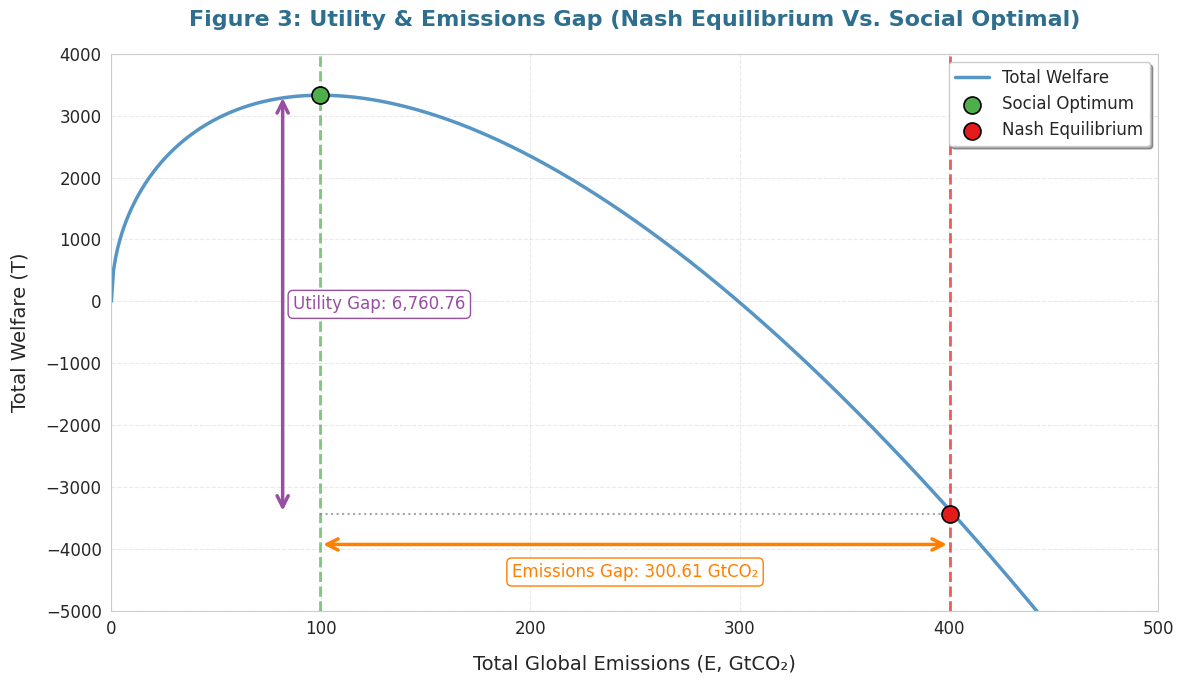

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# Parameters
alpha = {'UK': 100.0, 'USA': 200.0, 'China': 400.0, 'India': 200.0}
d = {'UK': 1.42, 'USA': 1.48, 'China': 1.66, 'India': 2.12}
sum_alpha_sq = sum([a**2 for a in alpha.values()])
D = sum(d.values())

# Social optimum and Nash equilibrium values
E_social = 99.80
T_social = 3330.00
E_nash = 400.41
T_nash = -3430.76

# Total welfare function
def total_utility(E):
    return np.sqrt(E) * (np.sqrt(sum_alpha_sq) - (D * E)/4)

# Generate data (starting from E=0)
E_values = np.linspace(0, 500, 500)
T_values = total_utility(E_values)

# Create figure
plt.figure(figsize=(12, 7), dpi=100)

# Plot total welfare curve
plt.plot(E_values, T_values, label='Total Welfare',
         color='#2c7bb6', linewidth=2.5, alpha=0.8)

# Mark key points
plt.scatter(E_social, T_social, color='#4daf4a', s=150, zorder=5,
            label='Social Optimum', edgecolor='black', linewidth=1.2)
plt.scatter(E_nash, T_nash, color='#e41a1c', s=150, zorder=5,
            label='Nash Equilibrium', edgecolor='black', linewidth=1.2)

# Vertical dashed lines
plt.axvline(E_social, color='#4daf4a', linestyle='--', linewidth=2, alpha=0.7)
plt.axvline(E_nash, color='#e41a1c', linestyle='--', linewidth=2, alpha=0.7)

# Horizontal connection line
plt.hlines(y=T_nash, xmin=E_social, xmax=E_nash,
          colors='gray', linestyles=':', linewidth=1.5, alpha=0.7)

# Emissions gap annotation (horizontal)
plt.annotate('',
             xy=(E_social, T_nash - 500),
             xytext=(E_nash, T_nash - 500),
             arrowprops=dict(arrowstyle='<->', color='#ff7f00',
                             linewidth=2.5, mutation_scale=20))

# Utility gap annotation
utility_gap_offset = 18
plt.annotate('',
             xy=(E_social - utility_gap_offset, T_nash),  # Start point
             xytext=(E_social - utility_gap_offset, T_social),  # End point
             arrowprops=dict(arrowstyle='<->', color='#984ea3',
                             linewidth=2.5, mutation_scale=20))


plt.text((E_social + E_nash)/2, T_nash - 800,
         f'Emissions Gap: {E_nash - E_social:.2f} GtCO₂',
         ha='center', va='top', color='#ff7f00', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='#ff7f00', boxstyle='round'))

plt.text(E_social - utility_gap_offset + 5, (T_social + T_nash)/2,
         f'Utility Gap: {T_social - T_nash:,.2f}',
         ha='left', va='center', color='#984ea3', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='#984ea3', boxstyle='round'))

# Axis settings
plt.xlabel('Total Global Emissions (E, GtCO₂)', fontsize=14, labelpad=12)
plt.ylabel('Total Welfare (T)', fontsize=14, labelpad=12)
plt.xlim(0, 500)
plt.ylim(-5000, 4000)
plt.title('Figure 3: Utility & Emissions Gap (Nash Equilibrium Vs. Social Optimal)',
          fontsize=16, pad=20, fontweight='bold',color = '#2e6e8e')
plt.legend(loc='upper right', frameon=True, shadow=True)
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()